In [1]:
import matplotlib.pyplot as plt
import nidaqmx.system
system = nidaqmx.system.System.local()
system.driver_version

ModuleNotFoundError: No module named 'nidaqmx'

In [2]:
conda install -c conda-forge nidaqmx-python

Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\bruyant\Miniconda3

  added / updated specs:
    - nidaqmx-python


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    deprecation-2.1.0          |     pyh9f0ad1d_0          14 KB  conda-forge
    nidaqmx-python-0.8.0       |     pyhd8ed1ab_0         313 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         327 KB

The following NEW packages will be INSTALLED:

  deprecation        conda-forge/noarch::deprecation-2.1.0-pyh9f0ad1d_0 
  nidaqmx-python     conda-forge/noarch::nidaqmx-python-0.8.0-pyhd8ed1ab_0 



Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you may need to resta

In [ ]:
python -m pip install nidaqmx

In [3]:
dev=system.devices.device_names[0] # autodetect first device
dev

NameError: name 'system' is not defined

In [ ]:
import numpy as np

#generate fake sig
Fs=1e6
fex=20e3
t=np.arange(-5/fex,11/fex,1/Fs)
Ve=(t>0)*(t<10/fex)*np.sin(t*fex*2*np.pi)

# ensure the the array is good to send to daqmx
Ve=np.ascontiguousarray(Ve)


# AO write

In [7]:
taskAO=nidaqmx.Task()
# create the channel
ao1=taskAO.ao_channels.add_ao_voltage_chan(dev+"/ao0",max_val=10,min_val=-10)  
# configure sample rate
taskAO.timing.cfg_samp_clk_timing(1e6, samps_per_chan=Ve.size  )
# Put datasd into buffer and start task
taskAO.write(Ve,auto_start=True)  
taskAO.wait_until_done()
taskAO.stop()

In [8]:
help(taskAO.ao_channels.add_ao_voltage_chan)
#taskAO.close()

Help on method add_ao_voltage_chan in module nidaqmx._task_modules.ao_channel_collection:

add_ao_voltage_chan(physical_channel, name_to_assign_to_channel='', min_val=-10.0, max_val=10.0, units=<VoltageUnits.VOLTS: 10348>, custom_scale_name='') method of nidaqmx._task_modules.ao_channel_collection.AOChannelCollection instance
    Creates channel(s) to generate voltage.
    
    Args:
        physical_channel (str): Specifies the names of the physical
            channels to use to create virtual channels. The DAQmx
            physical channel constant lists all physical channels on
            devices and modules installed in the system.
        name_to_assign_to_channel (Optional[str]): Specifies a name
            to assign to the virtual channel this function creates.
            If you do not specify a value for this input, NI-DAQmx
            uses the physical channel name as the virtual channel
            name.
        min_val (Optional[float]): Specifies in **units** the
    

In [9]:
with nidaqmx.Task() as taskAO:
    # create the channel
    ao1=taskAO.ao_channels.add_ao_voltage_chan(dev+"/ao0",max_val=10,min_val=-10)  
    # configure sample rate
    taskAO.timing.cfg_samp_clk_timing(1e6, samps_per_chan=Ve.size)
    # Put datasd into buffer and start task
    taskAO.write(Ve,auto_start=True)  
    taskAO.wait_until_done()
    taskAO.stop()


DaqError: The specified resource is reserved. The operation could not be completed as specified.
Task Name: _unnamedTask<1>

Status Code: -50103

# AI read

In [11]:
nsamples=100000
taskAI=nidaqmx.Task()
# create the channel
aI1=taskAI.ai_channels.add_ai_voltage_chan(dev+"/ai0",max_val=10,min_val=-10)  
# configure sample rate
taskAI.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=nsamples)
taskAI.start() 
taskAI.wait_until_done()
datas=taskAI.read(number_of_samples_per_channel=nsamples, timeout=10.0)
taskAI.stop()

C:\ProgramData\Anaconda3\lib\site-packages\nidaqmx\task.py:102: ResourceWarning: Task of name "_unnamedTask<0>" was not explicitly closed before it was destructed. Resources on the task device may still be reserved.
  warnings.warn(


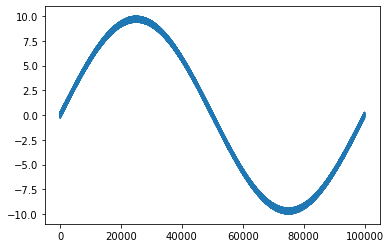

In [12]:
plt.plot(datas)

In [13]:
help(taskAI.read)
taskAI.close()

Help on method read in module nidaqmx.task:

read(number_of_samples_per_channel=<nidaqmx.task.UnsetNumSamplesSentinel object at 0x0000014914B76640>, timeout=10.0) method of nidaqmx.task.Task instance
    Reads samples from the task or virtual channels you specify.
    
    This read method is dynamic, and is capable of inferring an appropriate
    return type based on these factors:
    - The channel type of the task.
    - The number of channels to read.
    - The number of samples per channel.
    
    The data type of the samples returned is independently determined by
    the channel type of the task.
    
    For digital input measurements, the data type of the samples returned
    is determined by the line grouping format of the digital lines.
    If the line grouping format is set to "one channel for all lines", the
    data type of the samples returned is int. If the line grouping
    format is set to "one channel per line", the data type of the samples
    returned is boolean.

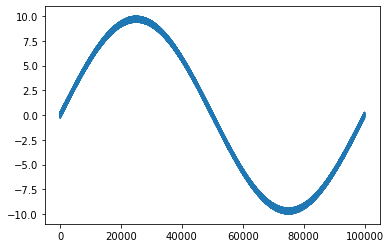

In [14]:
nsamples=100000
with nidaqmx.Task() as taskAI:
    # create the channel
    aI1=taskAI.ai_channels.add_ai_voltage_chan(dev+"/ai0",max_val=10,min_val=-10)  
    # configure sample rate
    taskAI.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=nsamples)
    taskAI.start() 
    taskAI.wait_until_done()
    datas=taskAI.read(number_of_samples_per_channel=nsamples, timeout=10.0)
    taskAI.stop()
    plt.plot(datas)

In [15]:
nsamples=20000
with nidaqmx.Task() as taskAI, nidaqmx.Task() as taskAO:
    # create the channel
    aI1=taskAI.ai_channels.add_ai_voltage_chan(dev+"/ai0",max_val=10,min_val=-10)
    ao1=taskAO.ao_channels.add_ao_voltage_chan(dev+"/ao0",max_val=10,min_val=-10)
    
    # configure sample rate
    taskAI.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=nsamples)
    taskAO.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=Ve.size)
    
    taskAI.start()
    taskAO.write(Ve,auto_start=True)
    
    taskAO.wait_until_done()
    taskAI.wait_until_done()
    
    datas=taskAI.read(number_of_samples_per_channel=nsamples, timeout=10.0)
    
    taskAI.stop()
    taskAO.stop() 
    plt.plot(datas)
    plt.plot(*getfirstedge(datas),'o')   
getfirstedge(datas)[0]    

DaqError: The specified resource is reserved. The operation could not be completed as specified.
Task Name: _unnamedTask<5>

Status Code: -50103

In [42]:
def getfirstedge(datas,treshold=0.5):
    datas=np.asarray(datas)
    edges=np.where(datas>treshold)
    return edges[0][0],datas[edges[0][0]]

1256

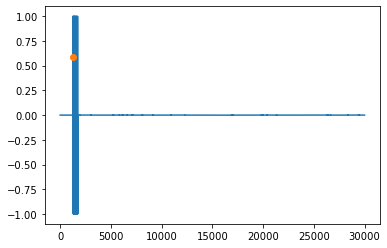

In [72]:
nsamples=30000
with nidaqmx.Task() as taskAI, nidaqmx.Task() as taskAO:
    # create the channel
    aI1=taskAI.ai_channels.add_ai_voltage_chan(dev+"/ai0",max_val=10,min_val=-10)
    ao1=taskAO.ao_channels.add_ao_voltage_chan(dev+"/ao0",max_val=10,min_val=-10)
    
    # configure sample rate
    taskAI.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=nsamples)
    taskAO.timing.cfg_samp_clk_timing(rate=1e6, samps_per_chan=Ve.size)
    
    #configure trigger
    taskAI.triggers.reference_trigger.cfg_dig_edge_ref_trig('/'+dev+'/ao/StartTrigger',
                                                            pretrigger_samples= 1000)
    
    taskAI.start()
    taskAO.write(Ve,auto_start=True)
    
    taskAO.wait_until_done()
    taskAI.wait_until_done()
    
    datas=taskAI.read(number_of_samples_per_channel=nsamples, timeout=10.0)
    
    taskAI.stop()
    taskAO.stop() 
    plt.plot(datas)
    plt.plot(*getfirstedge(datas),'o')   
getfirstedge(datas)[0]   

In [54]:
dev+'/ao/StartTrigger'

'Dev1/ao/StartTrigger'